<h1> Lapakis Gerasimos - P3170089 - ICAD ASSIGNMENT 2: Exploring the Rosetta Stone of Human Capital</h1>

**Note: This file uses relative file paths, so all files must be included in the same directory as this ipynb.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import statsmodels.formula.api as smf
import scipy.stats.stats as stats
from plotnine import *
%matplotlib inline
matplotlib.style.use('ggplot')
pd.set_option('display.max_columns', None)

<h2>Q1: Income and Test Results</h2>

We go to the 2nd sheet of the excel file, named Country Scores.

In [2]:
country_scores = pd.read_excel('https://www.cgdev.org/sites/default/files/patel-sandefur-human-capital-final-results.xlsx','Country Scores')

We exclude the last lines of our csv as they are junk.  
We keep the series code NY.GDP.PCAP.PP.KD as it is the GDP per capita, PPP code, that we need.

In [3]:
wdi = pd.read_csv('WDI_data.csv',nrows=792)
wdi = wdi.loc[wdi['Series Code'].isin(['NY.GDP.PCAP.PP.KD'])]

We merge the two files on country code

In [4]:
country_scores = pd.merge(country_scores,
               wdi[['2015 [YR2015]','Country Code']], 
               on='Country Code', 
               how='inner')

We rename some columns, to be better looking.

In [5]:
country_scores = country_scores.rename(columns={'Percent Above Math Benchmark (400 on TIMSS Scale)': 'ABOVE_400_TIMSS', 'Percent Above Reading Benchmark (400 on PIRLS Scale)': 'ABOVE_400_PIRLS'})

country_scores = country_scores.rename(columns={'Median Math Score (TIMSS Scale, 4th Grade)': 'MEDIAN_TIMSS', 'Median Reading Score (PIRLS Scale, 4th Grade)': 'MEDIAN_PIRLS'})

country_scores = country_scores.rename(columns={'2015 [YR2015]': 'GDP_2015'})

We also make GDP_2015 a float, because we checked with dtypes and it was an object.

In [6]:
country_scores['GDP_2015'] = country_scores['GDP_2015'].astype('float')

We need the logged GDP

In [7]:
country_scores['GDP_2015'] = np.log(country_scores['GDP_2015'])

We exclude the countries that do not have a MEDIAN TIMSS score.

In [8]:
country_scores_TIMSS  = country_scores [country_scores ['MEDIAN_TIMSS'].notna()].copy()

In [9]:
mod = smf.ols('MEDIAN_TIMSS ~ GDP_2015', data=country_scores_TIMSS)
country_scores_res_q1_TIMSS = mod.fit()
country_scores_res_q1_TIMSS.params

Intercept    46.117041
GDP_2015     41.745974
dtype: float64

The relationship between MEDIAN_TIMSS (y) and logged GDP_2015 (x) is: y = 46.117041 + 41.745974x

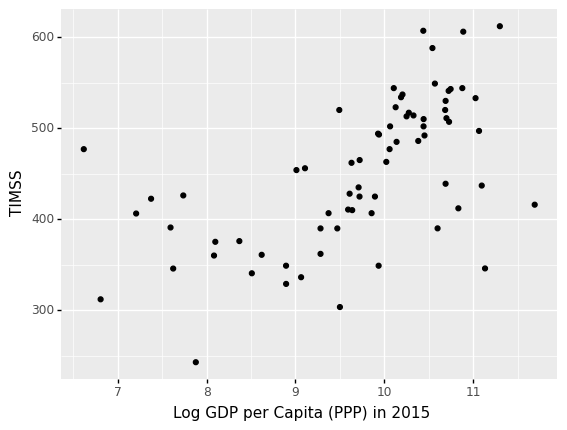

<ggplot: (109360064497)>

In [10]:
ggplot(data=country_scores_TIMSS) + geom_point(mapping=aes(x='GDP_2015', y='MEDIAN_TIMSS')) + xlab("Log GDP per Capita (PPP) in 2015") + ylab("TIMSS")

We get the residuals with resid.to_frame() to use them at the next question.

In [11]:
country_scores_TIMSS['RESID_Q1'] = country_scores_res_q1_TIMSS.resid.to_frame()

We do the same process for PIRLS.

In [12]:
country_scores_PIRLS  = country_scores [country_scores ['MEDIAN_PIRLS'].notna()].copy()

In [13]:
mod = smf.ols('MEDIAN_PIRLS ~ GDP_2015', data=country_scores_PIRLS)
country_scores_res_q1_PIRLS = mod.fit()
country_scores_res_q1_PIRLS.params

Intercept    42.619127
GDP_2015     43.912415
dtype: float64

The relationship between MEDIAN_PIRLS (y) and logged GDP_2015 (x) is: y = 42.619127 + 43.912415x

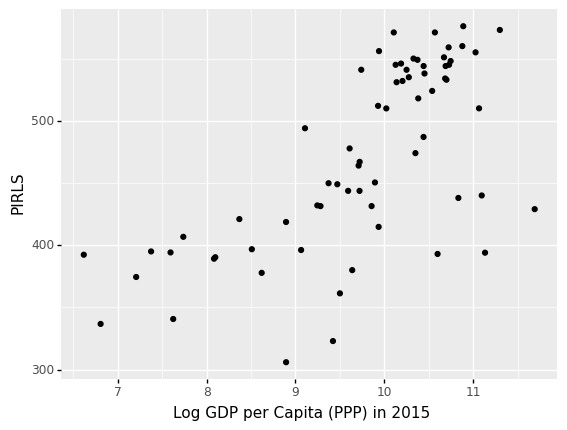

<ggplot: (109361451216)>

In [14]:
ggplot(data=country_scores_PIRLS) + geom_point(mapping=aes(x='GDP_2015', y='MEDIAN_PIRLS')) + xlab("Log GDP per Capita (PPP) in 2015") + ylab("PIRLS")

In [15]:
country_scores_PIRLS['RESID_Q1'] = country_scores_res_q1_PIRLS.resid.to_frame()

<h2>Q2: Years of Schooling and Test Scores</h2>

We keep 2010 as date and rename WBcode to Country Code so we can merge with our dataframes.

In [16]:
avg_yrs = pd.read_stata('BL2013_MF1599_v2.2.dta')
avg_yrs = avg_yrs.loc[(avg_yrs['year']==2010.0)]
avg_yrs = avg_yrs.rename(columns={'WBcode': 'Country Code'})

In [17]:
country_scores_yrs_TIMSS = pd.merge(country_scores_TIMSS,
               avg_yrs[['Country Code','yr_sch']], 
               on='Country Code', 
               how='inner')

In [18]:
country_scores_yrs_PIRLS = pd.merge(country_scores_PIRLS,
               avg_yrs[['Country Code','yr_sch']], 
               on='Country Code', 
               how='inner')

We fit a model between the logged GDP and the years of school.

In [19]:
mod = smf.ols('yr_sch ~ GDP_2015', data=country_scores_yrs_TIMSS)
country_scores_yrs_TIMSS_res = mod.fit()
country_scores_yrs_TIMSS_res.params

Intercept   -9.921657
GDP_2015     1.926067
dtype: float64

The relationship between yr_sch (y) and logged GDP_2015 (x) is: y = -9.921657 + 1.926067x

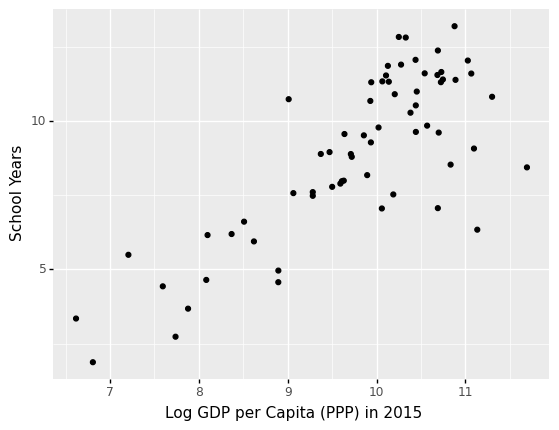

<ggplot: (109361451120)>

In [20]:
ggplot(data=country_scores_yrs_TIMSS) + geom_point(mapping=aes(x='GDP_2015', y='yr_sch')) + xlab("Log GDP per Capita (PPP) in 2015") + ylab("School Years")

In [21]:
mod = smf.ols('yr_sch ~ GDP_2015', data=country_scores_yrs_PIRLS)
country_scores_yrs_PIRLS_res = mod.fit()
country_scores_yrs_PIRLS_res.params

Intercept   -10.182531
GDP_2015      1.967089
dtype: float64

The relationship between yr_sch (y) and logged GDP_2015 (x) is: y = -10.182531 + 1.967089x

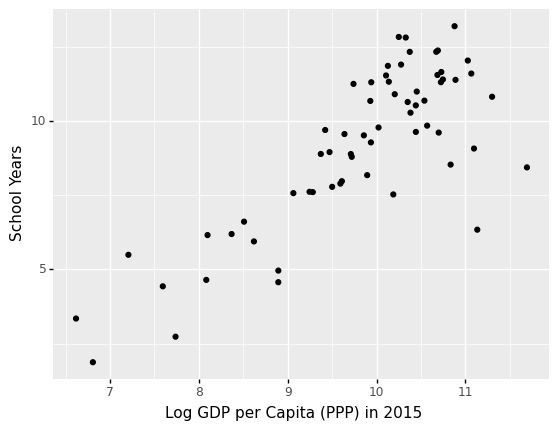

<ggplot: (109361451111)>

In [22]:
ggplot(data=country_scores_yrs_PIRLS) + geom_point(mapping=aes(x='GDP_2015', y='yr_sch')) + xlab("Log GDP per Capita (PPP) in 2015") + ylab("School Years")

We also get the residuals from the plots above.

In [23]:
country_scores_yrs_TIMSS['RESID_Q2'] = country_scores_yrs_TIMSS_res.resid.to_frame()

In [24]:
country_scores_yrs_PIRLS['RESID_Q2'] = country_scores_yrs_PIRLS_res.resid.to_frame()

We fit a model between residuals from Q1 and the residuals above. 

In [25]:
mod = smf.ols('RESID_Q1 ~ RESID_Q2', data=country_scores_yrs_TIMSS)
country_scores_yrs_TIMSS_res = mod.fit()
country_scores_yrs_TIMSS_res.params

Intercept    -1.100703
RESID_Q2     21.640917
dtype: float64

The relationship between RESID_Q1 (y) and logged RESID_Q2 (x) is: y = -1.100703 + 21.640917x

In [26]:
mod = smf.ols('RESID_Q1 ~ RESID_Q2', data=country_scores_yrs_PIRLS)
country_scores_yrs_PIRLS_res = mod.fit()
country_scores_yrs_PIRLS_res.params

Intercept     1.181636
RESID_Q2     20.248068
dtype: float64

The relationship between RESID_Q1 (y) and logged RESID_Q2 (x) is: y = 1.181636 + 20.248068x

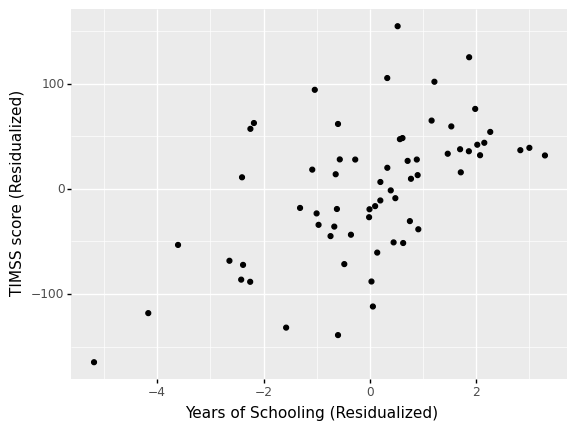

<ggplot: (109361454677)>

In [27]:
ggplot(data=country_scores_yrs_TIMSS) + geom_point(mapping=aes(x='RESID_Q2', y='RESID_Q1')) + xlab("Years of Schooling (Residualized)") + ylab("TIMSS score (Residualized)")

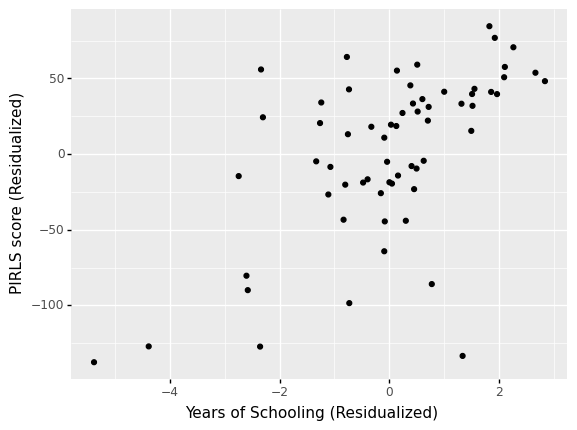

<ggplot: (109361452692)>

In [28]:
ggplot(data=country_scores_yrs_PIRLS) + geom_point(mapping=aes(x='RESID_Q2', y='RESID_Q1')) + xlab("Years of Schooling (Residualized)") + ylab("PIRLS score (Residualized)") 

<h2>Q3: Compare New and Previous Estimates</h2>

In [29]:
HLO = pd.read_stata('HLO Panel Data (mean, thresh) - Jan 2018.dta')

We check low_threshold column for null values.

In [30]:
HLO = HLO[HLO['low_threshold'].notna()]

To get the latest date available we must group by cntabb and use describe on year.  
We then merge this temporary dataframe with HLO on cntabb and year to keep the max date rows only.  
We also rename the column max to year so we can merge.  

In [31]:
HLO_maxdates = HLO.groupby("cntabb").year.describe()
HLO_maxdates = HLO_maxdates.reset_index()
HLO_maxdates = HLO_maxdates.rename(columns={'max': 'year'})

In [32]:
HLO = pd.merge(HLO,
               HLO_maxdates[['cntabb','year']], 
               on=['cntabb','year'], 
               how='inner')

In [33]:
HLO = HLO.rename(columns={'cntabb': 'Country Code'})

We merge the dataframes of question 1 with the HLO dataframe

In [34]:
new_country_scores_TIMSS = pd.merge(country_scores_TIMSS,
               HLO, 
               on='Country Code', 
               how='inner')

In [35]:
new_country_scores_PIRLS = pd.merge(country_scores_PIRLS,
               HLO, 
               on='Country Code', 
               how='inner')

We filter out na values for TIMSS and PIRLS

In [36]:
new_country_scores_TIMSS = new_country_scores_TIMSS[new_country_scores_TIMSS['ABOVE_400_TIMSS'].notna()]

In [37]:
new_country_scores_PIRLS = new_country_scores_PIRLS[new_country_scores_PIRLS['ABOVE_400_PIRLS'].notna()]

In [38]:
print('Spearman', stats.spearmanr(new_country_scores_TIMSS['ABOVE_400_TIMSS'], new_country_scores_TIMSS['low_threshold']))

Spearman SpearmanrResult(correlation=0.8973790562032015, pvalue=1.6879737641244243e-25)


In [39]:
print('Spearman', stats.spearmanr(new_country_scores_PIRLS['ABOVE_400_PIRLS'], new_country_scores_PIRLS['low_threshold']))

Spearman SpearmanrResult(correlation=0.904517341824943, pvalue=5.290584772193869e-25)


We fit a model between ABOVE_400_TIMSS and low_threshold. 

In [40]:
mod = smf.ols('ABOVE_400_TIMSS ~ low_threshold', data=new_country_scores_TIMSS)
new_country_scores_TIMSS_res = mod.fit()
new_country_scores_TIMSS_res.params

Intercept       -10.655545
low_threshold     1.082992
dtype: float64

The relationship between ABOVE_400_TIMSS (y) and low_threshold (x) is: y = -10.655545 + 1.082992x

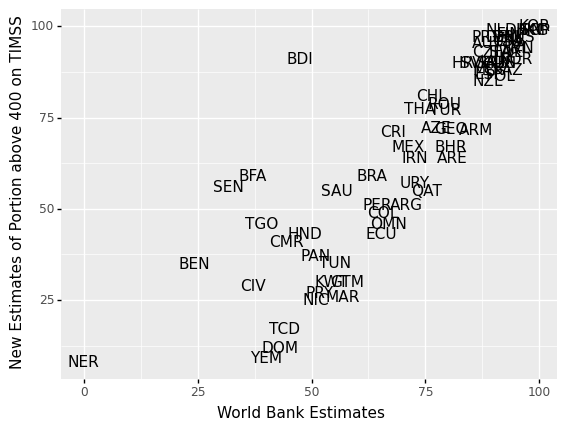

<ggplot: (109361462842)>

In [41]:
ggplot(data=new_country_scores_TIMSS) + geom_text(aes(x='low_threshold', y='ABOVE_400_TIMSS',label='Country Code')) + xlab("World Bank Estimates") + ylab("New Estimates of Portion above 400 on TIMSS") 

We fit a model between ABOVE_400_PIRLS and low_threshold. 

In [42]:
mod = smf.ols('ABOVE_400_PIRLS ~ low_threshold', data=new_country_scores_PIRLS)
new_country_scores_PIRLS_res = mod.fit()
new_country_scores_PIRLS_res.params

Intercept       -3.298501
low_threshold    1.070801
dtype: float64

The relationship between ABOVE_400_TIMSS (y) and low_threshold (x) is: y = -3.298501 + 1.070801x

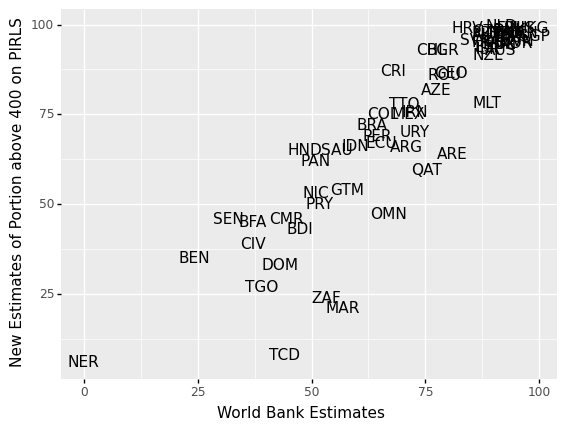

<ggplot: (109361478479)>

In [43]:
ggplot(data=new_country_scores_PIRLS) + geom_text(aes(x='low_threshold', y='ABOVE_400_PIRLS',label='Country Code')) + xlab("World Bank Estimates") + ylab("New Estimates of Portion above 400 on PIRLS") 

<h2>Q4: Skills Intensity</h2>

In [44]:
census = pd.read_csv('usa_00001.csv.gz')

We identify college and highschool graduates.  
We group by industry and sum all PERWT to find how many people work in an industry from each category.  

In [45]:
college_grad = census.loc[census['EDUC']>=10]
college_grad = college_grad.groupby('IND', as_index=False).sum('PERWT')
college_grad = college_grad.rename(columns={'PERWT': 'CLG_PERWT_BY_IND'})

In [46]:
hs_grad = census.loc[(census['EDUC']>=6)]
hs_grad = hs_grad.groupby('IND', as_index=False).sum('PERWT')
hs_grad = hs_grad.rename(columns={'PERWT': 'HS_PERWT_BY_IND'})

We merge the 2 dataframes. 

In [47]:
skills_intensity_industry = pd.merge(college_grad[['CLG_PERWT_BY_IND','IND']],
               hs_grad[['HS_PERWT_BY_IND','IND']], 
               on='IND', 
               how='outer')

We add the 2 PERWT for each industry so we can get the total PERWT for 2000

In [48]:
skills_intensity_industry['TOTAL_PERWT'] = skills_intensity_industry['CLG_PERWT_BY_IND'] + skills_intensity_industry['HS_PERWT_BY_IND']

We map industry codes of 2000 to the ones of 1990

In [49]:
cw_ind2000 = pd.read_stata('cw_ind2000_ind1990ddx.dta')

In [50]:
skills_intensity_industry = skills_intensity_industry.rename(columns={'IND': 'ind2000'})

In [51]:
skills_intensity_industry = pd.merge(cw_ind2000,
               skills_intensity_industry, 
               on='ind2000', 
               how='inner')

We calculate the 1990 PERWT by multiplying the 2000 PERWT with weight.  

In [52]:
skills_intensity_industry['PERWT_BY_IND_CLG_1990'] = skills_intensity_industry['CLG_PERWT_BY_IND'] * skills_intensity_industry['weight']

skills_intensity_industry['PERWT_BY_IND_HS_1990'] = skills_intensity_industry['HS_PERWT_BY_IND'] * skills_intensity_industry['weight']

skills_intensity_industry['TOTAL_PERWT_1990'] = skills_intensity_industry['TOTAL_PERWT'] * skills_intensity_industry['weight']

We find the portion by dividing the PERWT of 1990 with total PERWT

In [53]:
skills_intensity_industry['PORTION_HS'] = skills_intensity_industry['PERWT_BY_IND_HS_1990'] / skills_intensity_industry['TOTAL_PERWT_1990']

skills_intensity_industry['PORTION_CLG'] = skills_intensity_industry['PERWT_BY_IND_CLG_1990'] / skills_intensity_industry['TOTAL_PERWT_1990']

In [54]:
skills_intensity_industry = skills_intensity_industry.groupby('ind1990ddx',as_index=False).sum()

BACI file shows exports of different countries in 2018 for different industry sectors.

In [55]:
exports = pd.read_csv('BACI_HS17_Y2018_V202001.csv.gz')

We map the HS6 code with the SIC87 code, merging with the crosswalk file cw_hs6_sic87dd.

In [56]:
exports = exports.rename(columns={'k': 'hs6'})

In [57]:
mapper = pd.read_stata('cw_hs6_sic87dd.dta')

In [58]:
exports = pd.merge(exports,
               mapper, 
               on='hs6', 
               how='inner')

We adjust the trade flow and group it by exporter and SIC87, getting total value per exporter and industry

In [59]:
exports['tradeflow'] = exports['share'] * exports['v']

In [60]:
exports = exports.groupby(['i','sic87dd'],as_index=False).sum('tradeflow')

In [61]:
exports = exports.rename(columns={'sic87dd': 'sic87'})

We map to the 1990 SIC87 codes.

In [62]:
mapper2 = pd.read_stata('cw_sic87_ind1990ddx.dta')

In [63]:
exports = pd.merge(exports,
               mapper2, 
               on='sic87', 
               how='inner')

We get the three letter country code at the exporter file, by merging with country_codes_V202001.

In [64]:
countries = pd.read_csv('country_codes_V202001.csv.gz', encoding='ISO-8859-1')

In [65]:
exports = exports.rename(columns={'i': 'country_code'})

In [66]:
exports = pd.merge(exports,
               countries[['country_code','iso_3digit_alpha']], 
               on='country_code', 
               how='inner')

In [67]:
exports = exports.rename(columns={'country_code': 'exports'})

We do 2 merges to get for each country, the value of exports per industry and the weighted average of high school graduates and college graduates.

In [68]:
exports = exports.rename(columns={'iso_3digit_alpha': 'Country Code'})

In [69]:
exports = pd.merge(exports,
               skills_intensity_industry, 
               on='ind1990ddx',
               how='inner')

In [70]:
exports = pd.merge(exports,
               country_scores, 
               on='Country Code', 
               how='inner')

We divide by 1000 to get a more readable result and log the tradeflow.

In [71]:
exports['MEDIAN_TIMSSDIV1000'] = exports['MEDIAN_TIMSS'] / 1000
exports['MEDIAN_PIRLSDIV1000'] = exports['MEDIAN_PIRLS'] / 1000

In [72]:
exports['log_tradeflow'] = np.log(exports['tradeflow'])

We now run the 4 regressions. 

$$ \log(V_{ci}) \sim \mathrm{TIMSS}_{c}/1000:\mathrm{college}_i + i + c $$

In [73]:
mod = smf.ols('log_tradeflow ~ MEDIAN_TIMSSDIV1000 : PORTION_CLG + ind1990ddx + Country', data=exports)
exports_1_res = mod.fit()
exports_1_res.params

Intercept                          8.033347
Country[T.Armenia]                -3.066905
Country[T.Australia]               1.709166
Country[T.Austria]                 2.828373
Country[T.Azerbaijan]             -3.353361
                                     ...   
Country[T.Uruguay]                -2.508942
Country[T.Yemen]                  -5.745484
Country[T.Yugoslavia]              0.574516
MEDIAN_TIMSSDIV1000:PORTION_CLG    0.184743
ind1990ddx                         0.000997
Length: 79, dtype: float64

**R-squared is 0.521 and Intercept 8.033347**

In [74]:
exports_1_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          log_tradeflow   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     420.0
Date:                Mon, 28 Dec 2020   Prob (F-statistic):               0.00
Time:                        20:14:39   Log-Likelihood:                -65757.
No. Observations:               27490   AIC:                         1.317e+05
Df Residuals:                   27418   BIC:                         1.322e+05
Df Model:                          71                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                           8.0333      0.132     60.722      0.000       7.774       8.293
Country[T.Armenia]                 -3.0669      0.187    -16.386      0.000      -3.434      -2.700
Country[T.Australia]                1.7092      0.181      9.466      0.000       1.355       2.063
Country[T.Austria]                  2.8284      0.180     15.674      0.000       2.475       3.182
Country[T.Azerbaijan]              -3.3534      0.189    -17.762      0.000      -3.723      -2.983
Country[T.Bahrain]                 -1.4958      0.184     -8.118      0.000      -1.857      -1.135
Country[T.Benin]                   -6.1573      0.227    -27.084      0.000      -6.603      -5.712
Country[T.Brazil]                   1.9089      0.180     10.588      0.000       1.556       2.262
Country[T.Bulgaria]             -1.134e-13   4.72e-15    -24.024      0.000   -1.23e-13   -1.04e-13
Country[T.Burkina Faso]            -5.8336      0.212    -27.553      0.000      -6.249      -5.419
Country[T.Burundi]                 -6.4823      0.271    -23.911      0.000      -7.014      -5.951
Country[T.Cameroon]                -4.3849      0.194    -22.551      0.000      -4.766      -4.004
Country[T.Canada]                2.308e-12    1.5e-13     15.426      0.000    2.01e-12     2.6e-12
Country[T.Chad]                    -6.4982      0.261    -24.906      0.000      -7.010      -5.987
Country[T.Chile]                    0.0491      0.181      0.271      0.786      -0.306       0.404
Country[T.Colombia]                -0.0941      0.181     -0.520      0.603      -0.449       0.261
Country[T.Congo]                   -5.0091      0.213    -23.500      0.000      -5.427      -4.591
Country[T.Costa Rica]              -1.3434      0.182     -7.369      0.000      -1.701      -0.986
Country[T.Cote d'Ivoire]           -2.5785      0.186    -13.873      0.000      -2.943      -2.214
Country[T.Croatia]                  0.5850      0.181      3.237      0.001       0.231       0.939
Country[T.Czech Republic]           2.7765      0.180     15.404      0.000       2.423       3.130
Country[T.Denmark]                  2.2167      0.180     12.282      0.000       1.863       2.571
Country[T.Dominican Republic]      -2.3407      0.186    -12.573      0.000      -2.706      -1.976
Country[T.Ecuador]                 -2.1676      0.184    -11.794      0.000      -2.528      -1.807
Country[T.Finland]                  1.2687      0.181      7.028      0.000       0.915       1.622
Country[T.France]                3.731e-14   2.69e-15     13.882      0.000     3.2e-14    4.26e-14
Country[T.Georgia]                 -3.2015      0.186    -17.177      0.000      -3.567      -2.836
Country[T.Germany]                  5.0728      0.180     28.156      0.000       4

$$ \log(V_{ci}) \sim \mathrm{PIRLS}_{c}/1000:\mathrm{college}_i + i + c $$

In [75]:
mod = smf.ols('log_tradeflow ~ MEDIAN_PIRLSDIV1000: PORTION_CLG + ind1990ddx + Country', data=exports)
exports_1_res = mod.fit()
exports_1_res.params

Intercept                          8.073687e+00
Country[T.Armenia]                 2.357020e-13
Country[T.Australia]               1.710753e+00
Country[T.Austria]                 2.828927e+00
Country[T.Azerbaijan]             -3.349049e+00
                                       ...     
Country[T.Uruguay]                -2.508308e+00
Country[T.Yemen]                   0.000000e+00
Country[T.Yugoslavia]              0.000000e+00
MEDIAN_PIRLSDIV1000:PORTION_CLG    1.826796e-01
ind1990ddx                         8.038734e-04
Length: 79, dtype: float64

**R-squared is 0.528 and Intercept 8.073687**

In [76]:
exports_1_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          log_tradeflow   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                     433.0
Date:                Mon, 28 Dec 2020   Prob (F-statistic):               0.00
Time:                        20:14:39   Log-Likelihood:                -62965.
No. Observations:               26401   AIC:                         1.261e+05
Df Residuals:                   26332   BIC:                         1.266e+05
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                           8.0737      0.132     61.380      0.000       7.816       8.332
Country[T.Armenia]               2.357e-13   1.08e-13      2.189      0.029    2.46e-14    4.47e-13
Country[T.Australia]                1.7108      0.179      9.543      0.000       1.359       2.062
Country[T.Austria]                  2.8289      0.179     15.789      0.000       2.478       3.180
Country[T.Azerbaijan]              -3.3490      0.187    -17.867      0.000      -3.716      -2.982
Country[T.Bahrain]              -1.068e-14   1.47e-15     -7.255      0.000   -1.36e-14    -7.8e-15
Country[T.Benin]                   -6.1520      0.226    -27.253      0.000      -6.594      -5.710
Country[T.Brazil]                   1.9076      0.179     10.656      0.000       1.557       2.259
Country[T.Bulgaria]                 1.1290      0.179      6.301      0.000       0.778       1.480
Country[T.Burkina Faso]            -5.8243      0.210    -27.704      0.000      -6.236      -5.412
Country[T.Burundi]                 -6.4658      0.269    -24.023      0.000      -6.993      -5.938
Country[T.Cameroon]                -4.3820      0.193    -22.696      0.000      -4.760      -4.004
Country[T.Canada]                   3.1438      0.179     17.574      0.000       2.793       3.494
Country[T.Chad]                    -6.4858      0.259    -25.033      0.000      -6.994      -5.978
Country[T.Chile]                    0.0464      0.180      0.258      0.796      -0.306       0.399
Country[T.Colombia]                -0.0983      0.180     -0.547      0.584      -0.451       0.254
Country[T.Congo]                   -5.0035      0.212    -23.639      0.000      -5.418      -4.589
Country[T.Costa Rica]              -1.3464      0.181     -7.437      0.000      -1.701      -0.992
Country[T.Cote d'Ivoire]           -2.5784      0.185    -13.971      0.000      -2.940      -2.217
Country[T.Croatia]                  0.5801      0.180      3.232      0.001       0.228       0.932
Country[T.Czech Republic]           2.7751      0.179     15.504      0.000       2.424       3.126
Country[T.Denmark]                  2.2179      0.179     12.376      0.000       1.867       2.569
Country[T.Dominican Republic]      -2.3442      0.185    -12.683      0.000      -2.706      -1.982
Country[T.Ecuador]                 -2.1695      0.182    -11.888      0.000      -2.527      -1.812
Country[T.Finland]                  1.2692      0.179      7.081      0.000       0.918       1.620
Country[T.France]                   4.0612      0.179     22.706      0.000       3.711       4.412
Country[T.Georgia]                 -3.2023      0.185    -17.303      0.000      -3.565      -2.840
Country[T.Germany]                  5.0742      0.179     28.367      0.000       4

$$ \log(V_{ci}) \sim \mathrm{TIMSS}_{c}/1000:\mathrm{highschool}_i + i + c $$

In [77]:
mod = smf.ols('log_tradeflow ~ MEDIAN_TIMSSDIV1000: PORTION_HS + ind1990ddx + Country', data=exports)
exports_1_res = mod.fit()
exports_1_res.params

Intercept                         8.040393
Country[T.Armenia]               -3.057653
Country[T.Australia]              1.729125
Country[T.Austria]                2.846418
Country[T.Azerbaijan]            -3.344356
                                    ...   
Country[T.Uruguay]               -2.505452
Country[T.Yemen]                 -5.768035
Country[T.Yugoslavia]             0.594384
MEDIAN_TIMSSDIV1000:PORTION_HS   -0.011785
ind1990ddx                        0.001296
Length: 79, dtype: float64

**R-squared is 0.521 and Intercept 8.040393**

In [78]:
exports_1_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          log_tradeflow   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     419.8
Date:                Mon, 28 Dec 2020   Prob (F-statistic):               0.00
Time:                        20:14:39   Log-Likelihood:                -65760.
No. Observations:               27490   AIC:                         1.317e+05
Df Residuals:                   27418   BIC:                         1.323e+05
Df Model:                          71                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                          8.0404      0.132     60.742      0.000       7.781       8.300
Country[T.Armenia]                -3.0577      0.187    -16.335      0.000      -3.425      -2.691
Country[T.Australia]               1.7291      0.181      9.574      0.000       1.375       2.083
Country[T.Austria]                 2.8464      0.180     15.771      0.000       2.493       3.200
Country[T.Azerbaijan]             -3.3444      0.189    -17.712      0.000      -3.714      -2.974
Country[T.Bahrain]                -1.4913      0.184     -8.092      0.000      -1.853      -1.130
Country[T.Benin]                  -6.1558      0.227    -27.074      0.000      -6.601      -5.710
Country[T.Brazil]                  1.9092      0.180     10.588      0.000       1.556       2.263
Country[T.Bulgaria]            -4.046e-15   2.48e-15     -1.633      0.103    -8.9e-15    8.11e-16
Country[T.Burkina Faso]           -5.8317      0.212    -27.540      0.000      -6.247      -5.417
Country[T.Burundi]                -6.4647      0.271    -23.843      0.000      -6.996      -5.933
Country[T.Cameroon]               -4.3901      0.194    -22.575      0.000      -4.771      -4.009
Country[T.Canada]              -4.201e-12   1.47e-13    -28.510      0.000   -4.49e-12   -3.91e-12
Country[T.Chad]                   -6.5120      0.261    -24.955      0.000      -7.024      -6.001
Country[T.Chile]                   0.0591      0.181      0.326      0.744      -0.296       0.414
Country[T.Colombia]               -0.0976      0.181     -0.539      0.590      -0.452       0.257
Country[T.Congo]                  -5.0217      0.213    -23.555      0.000      -5.440      -4.604
Country[T.Costa Rica]             -1.3393      0.182     -7.345      0.000      -1.697      -0.982
Country[T.Cote d'Ivoire]          -2.5878      0.186    -13.921      0.000      -2.952      -2.223
Country[T.Croatia]                 0.6002      0.181      3.320      0.001       0.246       0.954
Country[T.Czech Republic]          2.7950      0.180     15.504      0.000       2.442       3.148
Country[T.Denmark]                 2.2400      0.181     12.408      0.000       1.886       2.594
Country[T.Dominican Republic]     -2.3597      0.186    -12.673      0.000      -2.725      -1.995
Country[T.Ecuador]                -2.1703      0.184    -11.807      0.000      -2.531      -1.810
Country[T.Finland]                 1.2938      0.181      7.166      0.000       0.940       1.648
Country[T.France]               3.173e-13    1.1e-14     28.737      0.000    2.96e-13    3.39e-13
Country[T.Georgia]                -3.1921      0.186    -17.124      0.000      -3.557      -2.827
Country[T.Germany]                 5.0942      0.180     28.270      0.000       4.741       5.447
Country[T.Guat

$$ \log(V_{ci}) \sim \mathrm{PIRLS}_{c}/1000:\mathrm{highschool}_i + i + c $$

In [79]:
mod = smf.ols('log_tradeflow ~ MEDIAN_PIRLSDIV1000: PORTION_HS + ind1990ddx + Country', data=exports)
exports_1_res = mod.fit()
exports_1_res.params

Intercept                         8.083522e+00
Country[T.Armenia]                8.496410e-13
Country[T.Australia]              1.729875e+00
Country[T.Austria]                2.847525e+00
Country[T.Azerbaijan]            -3.343905e+00
                                      ...     
Country[T.Uruguay]               -2.504413e+00
Country[T.Yemen]                  0.000000e+00
Country[T.Yugoslavia]             0.000000e+00
MEDIAN_PIRLSDIV1000:PORTION_HS   -1.505306e-02
ind1990ddx                        1.132172e-03
Length: 79, dtype: float64

**R-squared is 0.528 and Intercept 8.083522**

In [80]:
exports_1_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          log_tradeflow   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                     432.8
Date:                Mon, 28 Dec 2020   Prob (F-statistic):               0.00
Time:                        20:14:40   Log-Likelihood:                -62968.
No. Observations:               26401   AIC:                         1.261e+05
Df Residuals:                   26332   BIC:                         1.266e+05
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                          8.0835      0.132     61.416      0.000       7.826       8.342
Country[T.Armenia]              8.496e-13   2.55e-14     33.369      0.000       8e-13       9e-13
Country[T.Australia]               1.7299      0.179      9.648      0.000       1.378       2.081
Country[T.Austria]                 2.8475      0.179     15.890      0.000       2.496       3.199
Country[T.Azerbaijan]             -3.3439      0.187    -17.837      0.000      -3.711      -2.976
Country[T.Bahrain]             -2.121e-15    2.5e-16     -8.492      0.000   -2.61e-15   -1.63e-15
Country[T.Benin]                  -6.1546      0.226    -27.261      0.000      -6.597      -5.712
Country[T.Brazil]                  1.9095      0.179     10.665      0.000       1.559       2.260
Country[T.Bulgaria]                1.1494      0.179      6.414      0.000       0.798       1.501
Country[T.Burkina Faso]           -5.8327      0.210    -27.740      0.000      -6.245      -5.421
Country[T.Burundi]                -6.4694      0.269    -24.033      0.000      -6.997      -5.942
Country[T.Cameroon]               -4.3895      0.193    -22.732      0.000      -4.768      -4.011
Country[T.Canada]                  3.1658      0.179     17.694      0.000       2.815       3.516
Country[T.Chad]                   -6.5071      0.259    -25.111      0.000      -7.015      -5.999
Country[T.Chile]                   0.0613      0.180      0.341      0.733      -0.291       0.414
Country[T.Colombia]               -0.0954      0.180     -0.531      0.596      -0.448       0.257
Country[T.Congo]                  -5.0185      0.212    -23.707      0.000      -5.433      -4.604
Country[T.Costa Rica]             -1.3371      0.181     -7.385      0.000      -1.692      -0.982
Country[T.Cote d'Ivoire]          -2.5875      0.185    -14.018      0.000      -2.949      -2.226
Country[T.Croatia]                 0.6035      0.180      3.361      0.001       0.252       0.955
Country[T.Czech Republic]          2.7969      0.179     15.623      0.000       2.446       3.148
Country[T.Denmark]                 2.2413      0.179     12.505      0.000       1.890       2.593
Country[T.Dominican Republic]     -2.3578      0.185    -12.755      0.000      -2.720      -1.995
Country[T.Ecuador]                -2.1690      0.183    -11.884      0.000      -2.527      -1.811
Country[T.Finland]                 1.2953      0.179      7.226      0.000       0.944       1.647
Country[T.France]                  4.0781      0.179     22.797      0.000       3.727       4.429
Country[T.Georgia]                -3.1898      0.185    -17.233      0.000      -3.553      -2.827
Country[T.Germany]                 5.0949      0.179     28.478      0.000       4.744       5.446
Country[T.Guat